In [150]:
import pandas as pd
data=pd.read_csv("C:/Users/venky kishore/Downloads/Fish.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr



In [152]:
data.drop(['Length1','Length2','Length3','Height','Width'],axis=1,inplace=True)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [154]:
data.describe()

,Weight
count,159.000000
mean,398.326415
std,357.978317
min,0.000000
25%,120.000000
50%,273.000000
75%,650.000000
max,1650.000000


In [155]:
data.Species.isnull().sum()

0

In [156]:
stats.shapiro(data.Weight)

ShapiroResult(statistic=0.8834666609764099, pvalue=7.605901464202702e-10)

(array([[159.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 59.,  31.,  12.,  18.,  16.,  11.,   8.,   1.,   0.,   3.]]),
 array([0.0, 165.0, 330.0, 495.0, 660.0, 825.0, 990.0, 1155.0, 1320.0,
        1485.0, 1650.0], dtype=object),
 <a list of 2 BarContainer objects>)

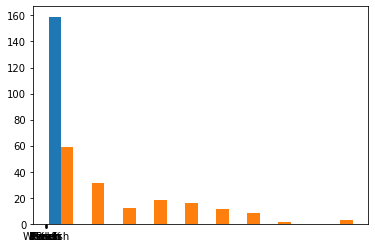

In [157]:
plt.hist(data)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

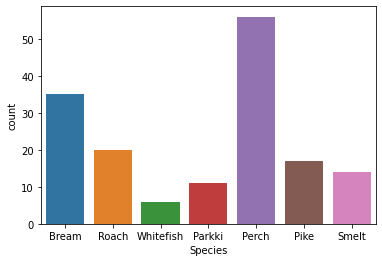

In [158]:
sns.countplot(data.Species)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='count'>

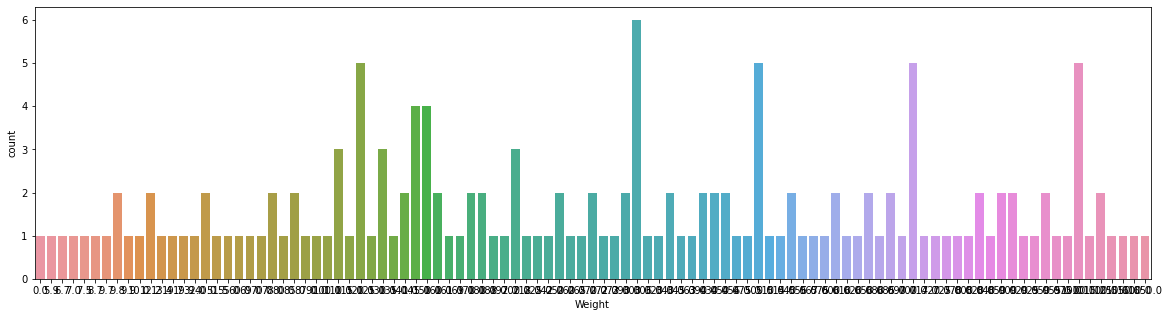

In [159]:
plt.figure(figsize=(20,5))
sns.countplot(data.Weight)

{'whiskers': [<matplotlib.lines.Line2D at 0x583be85f70>,
 'caps': [<matplotlib.lines.Line2D at 0x583be926d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x583be85be0>],
 'medians': [<matplotlib.lines.Line2D at 0x583be92e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x583be9d1f0>],
 'means': []}

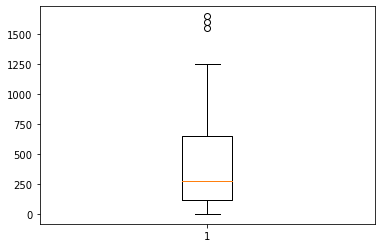

In [160]:
plt.boxplot(data.Weight)

In [161]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [162]:
train=data.iloc[0:127]
print(train)

    Species  Weight
0     Bream   242.0
1     Bream   290.0
2     Bream   340.0
3     Bream   363.0
4     Bream   430.0
..      ...     ...
122   Perch   820.0
123   Perch  1100.0
124   Perch  1000.0
125   Perch  1100.0
126   Perch  1000.0

[127 rows x 2 columns]


In [163]:
test=data.iloc[127:]
print(test)

    Species  Weight
127   Perch  1000.0
128    Pike   200.0
129    Pike   300.0
130    Pike   300.0
131    Pike   300.0
132    Pike   430.0
133    Pike   345.0
134    Pike   456.0
135    Pike   510.0
136    Pike   540.0
137    Pike   500.0
138    Pike   567.0
139    Pike   770.0
140    Pike   950.0
141    Pike  1250.0
142    Pike  1600.0
143    Pike  1550.0
144    Pike  1650.0
145   Smelt     6.7
146   Smelt     7.5
147   Smelt     7.0
148   Smelt     9.7
149   Smelt     9.8
150   Smelt     8.7
151   Smelt    10.0
152   Smelt     9.9
153   Smelt     9.8
154   Smelt    12.2
155   Smelt    13.4
156   Smelt    12.2
157   Smelt    19.7
158   Smelt    19.9


In [164]:
train.shape

(127, 2)

In [165]:
test.shape

(32, 2)

<AxesSubplot:xlabel='Weight', ylabel='Species'>

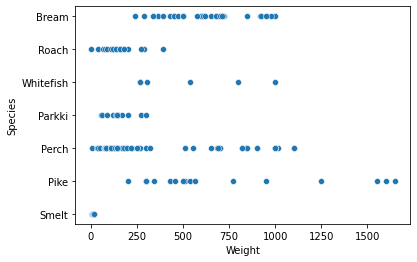

In [166]:
sns.scatterplot(x='Weight',y='Species',data=data)

In [167]:
import statsmodels.api as sm
train_x=train.Weight
print(train_x)


0       242.0
1       290.0
2       340.0
3       363.0
4       430.0
        ...  
122     820.0
123    1100.0
124    1000.0
125    1100.0
126    1000.0
Name: Weight, Length: 127, dtype: float64


In [168]:
train_y=train.Species
print(train_y)

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
122    Perch
123    Perch
124    Perch
125    Perch
126    Perch
Name: Species, Length: 127, dtype: object


In [169]:
train_x=sm.add_constant(train_x)

F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


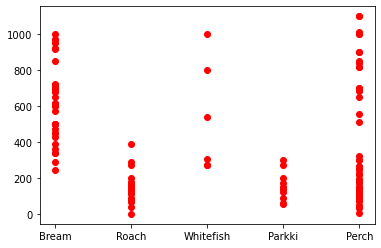

In [171]:
plt.scatter(x=train.Species,y=train.Weight,color='red')

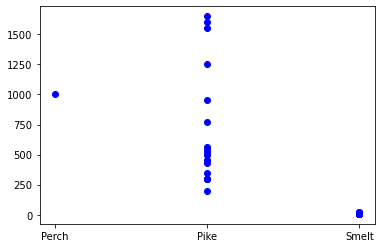

In [172]:
plt.scatter(x=test.Species,y=test.Weight,color='blue')

<AxesSubplot:xlabel='Species', ylabel='Weight'>

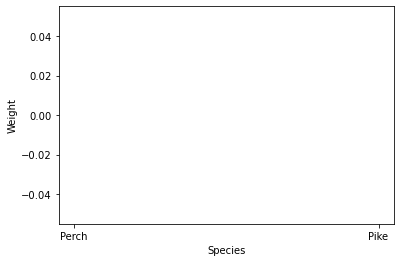

In [181]:
sns.lineplot(x=test.Species,y=test.Weight,color='green')

In [131]:
test_x=test.Weight
print(test_x)

127    1000.0
128     200.0
129     300.0
130     300.0
131     300.0
132     430.0
133     345.0
134     456.0
135     510.0
136     540.0
137     500.0
138     567.0
139     770.0
140     950.0
141    1250.0
142    1600.0
143    1550.0
144    1650.0
145       6.7
146       7.5
147       7.0
148       9.7
149       9.8
150       8.7
151      10.0
152       9.9
153       9.8
154      12.2
155      13.4
156      12.2
157      19.7
158      19.9
Name: Weight, dtype: float64


In [132]:
test_y=test.Species
print(test_y)

127    Perch
128     Pike
129     Pike
130     Pike
131     Pike
132     Pike
133     Pike
134     Pike
135     Pike
136     Pike
137     Pike
138     Pike
139     Pike
140     Pike
141     Pike
142     Pike
143     Pike
144     Pike
145    Smelt
146    Smelt
147    Smelt
148    Smelt
149    Smelt
150    Smelt
151    Smelt
152    Smelt
153    Smelt
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, dtype: object


In [133]:
test_x=sm.add_constant(test_x)

In [141]:
predicted_values=model.predict(test_x)

NameError: name 'model' is not defined